# Chennai House Price Prediction


### Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

### Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
df=pd.read_csv("train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

### Data Cleaning

In [4]:
#Correcting spelling issues in Area column
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [5]:
df['AREA'].replace(['Karapakam','Ann Nagar','Ana Nagar','TNagar','Chrompt','Chrmpet','Chormpet','Adyr','Velchery','KKNagar'],
                            ['Karapakkam','Anna Nagar','Anna Nagar','T Nagar','Chrompet','Chrompet','Chrompet','Adyar','Velachery','KK Nagar'],inplace=True)

In [6]:
#convert columns from object to datetimeindex
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
df['YEAR_BUILD'] = df['DATE_BUILD'].dt.year
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['YEAR_SALE'] = df['DATE_SALE'].dt.year
from datetime import date
year = date.today().year
df['BUILDING_AGE']=year-df['YEAR_BUILD']
df['BUILDING_AGE_AT_SALEDATE']=df['YEAR_SALE']-df['YEAR_BUILD']
df=df.drop(['DATE_SALE','DATE_BUILD'],axis=1)

In [7]:
#Handling nan values
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace=True)
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace=True)
mean=df['QS_OVERALL'].mean()
df['QS_OVERALL'].fillna(mean,inplace=True)
#converting columns with float dtype to int dtype
df['N_BEDROOM']=df['N_BEDROOM'].astype(int)
df['N_BATHROOM']=df['N_BATHROOM'].astype(int)

In [8]:
#Correcting speling
#df['SALE_COND'].unique()
df['SALE_COND'].replace(['Ab Normal','Partiall','PartiaLl','Adj Land'],['AbNormal','Partial','Partial','AdjLand'],inplace=True)
#df['PARK_FACIL'].unique()
df['PARK_FACIL'].replace(['Noo'],['No'],inplace=True)
#df['UTILITY_AVAIL'].unique()
df['UTILITY_AVAIL'].replace(['AllPub','NoSewr ','NoSeWa'],['All Pub','No Sewage','No Sewage' ],inplace=True)
#df['BUILDTYPE'].unique()
df['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'],inplace=True)
#df['STREET'].unique()
df['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'],inplace=True)

In [9]:
#dropping unwanted columns
#Registration fee and commision happens only after sale so we are dropping them
df=df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1)

### EDA


In [10]:
#Area - feature distribution 
area=df['AREA'].groupby(df['AREA']).count()
fig=px.bar(area,text=area,title="No of property sold area wise")
fig.update_layout(width=500,height=500,xaxis_title="Area",yaxis_title="Number of property sold",
                  xaxis={'categoryorder':'total ascending'})
fig.update_traces(textposition='outside')

The figure shows number of properties sold in different areas.Chrompet has the highest number of properties sold.

In [11]:
#Area vs sales price 
area_sale= df.pivot(columns='AREA', values='SALES_PRICE').mean()
fig=px.bar(area_sale,text=area_sale,title="Area Vs Average Sales Price", text_auto='.4s')
fig.update_layout(xaxis_title="Area",yaxis_title="Average sale price",width=500,height=500,
                  xaxis={'categoryorder':'total ascending'})
fig.update_traces(textposition='outside')
fig.show()

The average sales of the property ncreases linearly from Karppakam to T Nagar.

In [12]:
#SQFT distribution
fig=px.histogram(df,x='INT_SQFT',nbins=20,color_discrete_sequence=['salmon'])
fig.update_layout(autosize=False,width=500,height=300,)
fig.show()



Distribution of number of properties over the various sqft range is shown.

In [13]:
#SQFT vs Sales price
fig=px.scatter(df,x='INT_SQFT',y='SALES_PRICE',title='SQFT vs SALES_PRICE',color="AREA")
fig.update_layout(autosize=False,width=800,height=500,)
fig.show()

->As we can see from the above plot,there is a linear relationship between sqft and sales price.

->Maximum houses range between 1000 to 2000 sqft with sales price between 8M and 15M.

->Properties with high sales price seems to be in area Anna Nagar and T Nagar, while Karapakkam, Chrompet,Adayar and      
  Velachery areas seem to have less budget houses compared to them
  
->Houses in Velachery, T Nagar and Anna Nagar have area between 1500 and 2000 sqft 

->Houses in Adyar and chrompet have area between 600 and 1300 sqft 

->Houses in Karappakam and KK Nagar seems to have wide range of sqft.This shows all size of houses exists in these areas.

In [14]:
#Distance from main road vs Avg sales price
dist= df.pivot(columns='DIST_MAINROAD', values='SALES_PRICE').mean()
fig=px.bar(dist,x=dist.index,y=dist.values,color_discrete_sequence=['teal'])
fig.update_layout(width=600,height=400,)
fig.update_layout(xaxis_title="Distance from main road in meters",yaxis_title="Average Sale price of property")
fig.show()

The is no relationsip pattern between distance from main road and sales price.Hence dropping it.

In [15]:
df=df.drop(['DIST_MAINROAD'],axis=1)

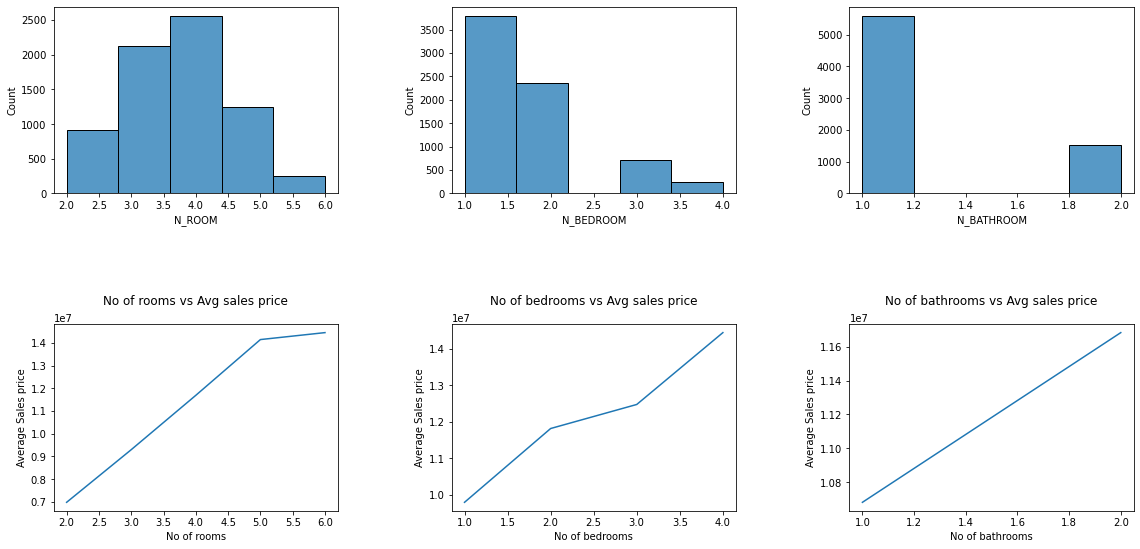

In [16]:
#Rooms distribution and comparision with sales price
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
sns.histplot(df["N_ROOM"],bins=5,kde = False)

plt.subplot(2,3,2)
sns.histplot(df["N_BEDROOM"],bins=5,kde = False)

plt.subplot(2,3,3)
sns.histplot(df["N_BATHROOM"],bins=5,kde = False)

room= df.pivot(columns='N_ROOM', values='SALES_PRICE').mean()
bedroom= df.pivot(columns='N_BEDROOM', values='SALES_PRICE').mean()
bathroom= df.pivot(columns='N_BATHROOM', values='SALES_PRICE').mean()

plt.subplot(2,3,4)
plt.plot(room)
plt.title("No of rooms vs Avg sales price",pad=20)
plt.xlabel('No of rooms')
plt.ylabel('Average Sales price')

plt.subplot(2,3,5)
plt.plot(bedroom)
plt.title("No of bedrooms vs Avg sales price",pad=20)
plt.xlabel('No of bedrooms')
plt.ylabel('Average Sales price')

plt.subplot(2,3,6)
plt.plot(bathroom)
plt.title("No of bathrooms vs Avg sales price",pad=20)
plt.xlabel('No of bathrooms')
plt.ylabel('Average Sales price')
plt.subplots_adjust(left=0.5,
                    bottom=0.1, 
                    right=2, 
                    top=0.8, 
                    wspace=0.4, 
                    hspace=0.7)
plt.show()

->The fig shows number of rooms and sales price is linearly related. As N_BEDROOM,N_BATHROOM features are covered in N_ROOM, we are dropping them.

In [17]:
df=df.drop(['N_BEDROOM','N_BATHROOM'],axis=1)

In [18]:
#Sales condition feature

fig = make_subplots(rows=1, cols=2, subplot_titles=['Distribution of SALE_COND','SALE_COND Vs Average Sales Price'])
sale_cond=df['SALE_COND'].value_counts()
sale_avg=df.pivot(columns='SALE_COND', values='SALES_PRICE').mean()
fig.add_trace(go.Scatter(x=sale_cond.index, y=sale_cond.values,mode='lines+markers',name='Count'), row=1, col=1)
fig.add_trace(go.Bar(x=sale_avg.index, y=sale_avg.values,text=sale_avg.values,name='Averge Sales price'),row=1, col=2)
fig.update_xaxes(categoryorder='total ascending')

Sales condition follows a linear relationship with the Average sales price.

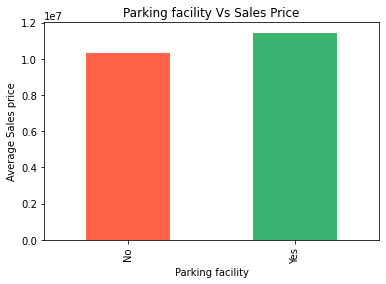

In [19]:

#Parking facility v Avg sales price
parking= df.pivot(columns='PARK_FACIL', values='SALES_PRICE').mean()
fig5=parking.plot(kind='bar',color=['tomato','mediumseagreen'])
plt.title('Parking facility Vs Sales Price')
plt.xlabel('Parking facility')
plt.ylabel('Average Sales price')
plt.show()

There is a linear relationship between parking facility and sales price. Average sales price for properties with parking facilities tends to be higher.

In [20]:
#Build type 
buidtype=df['BUILDTYPE'].groupby(df['BUILDTYPE']).count()
fig=px.bar(buidtype,text=buidtype,title="Buidtype of property sold")
fig.update_layout(autosize=False,width=400,height=400,xaxis={'categoryorder':'total ascending'})
fig.update_traces(textposition='inside')
fig.update_layout(xaxis_title="buidtype",yaxis_title="Number of property sold")

In [21]:
build_type=df.pivot(columns='BUILDTYPE', values='SALES_PRICE').mean()
fig=px.bar(build_type,text_auto='.4s',title='Avg sales price based on build type',color=build_type,
           color_continuous_scale="sunset")
fig.update_layout(width=500,height=500,xaxis_title="Property type",yaxis_title="Sale Price",
                  xaxis={'categoryorder':'total ascending'})
fig.update_traces(textposition="outside")

Commercial properties have high sales price than others and house category. No linear relationship observed.

In [22]:
df.groupby(['AREA','BUILDTYPE']).size().reset_index(name='count')

,AREA,BUILDTYPE,count
0,Adyar,Commercial,247
1,Adyar,House,263
2,Adyar,Others,264
3,Anna Nagar,Commercial,252
4,Anna Nagar,House,276
5,Anna Nagar,Others,260
6,Chrompet,Commercial,562
7,Chrompet,House,591
8,Chrompet,Others,549
9,KK Nagar,Commercial,322


Distribution of properties in all the areas n terms of Build_types seems to be equal. No particular trend is observed.

In [23]:
# df.pivot(columns='BUILDTYPE', values='SALES_PRICE').min()
# df.pivot(columns='BUILDTYPE', values='SALES_PRICE').max()

In [24]:
# UTILITY_AVAIL feature
fig = make_subplots(rows=1, cols=2, subplot_titles=['Distribution of UTILITY_AVAIL','UTILITY_AVAIL Vs Average Sales Price'])
utility=df['UTILITY_AVAIL'].value_counts()
sale_avg=df.pivot(columns='UTILITY_AVAIL', values='SALES_PRICE').mean()
fig.add_trace(go.Bar(x=utility.index, y=utility.values,text=utility.values,name="Count"), row=1, col=1)
fig.add_trace(go.Bar(x=sale_avg.index, y=sale_avg.values,text=sale_avg.values,name='Averge Sales price'),row=1, col=2)
fig.update_xaxes(categoryorder='total ascending')

In [25]:
#Street
street= df.pivot(columns='STREET', values='SALES_PRICE').mean()
fig=px.bar(street,text=street,title="Street Vs Sales Price", text_auto='.4s')
fig.update_layout(xaxis_title="Street",yaxis_title="Average sales price",width=500,height=500,xaxis={'categoryorder':'total ascending'})
fig.update_traces(textposition='outside')
fig.show()

There is a slightly linear relationship observed between Street and average sales price.

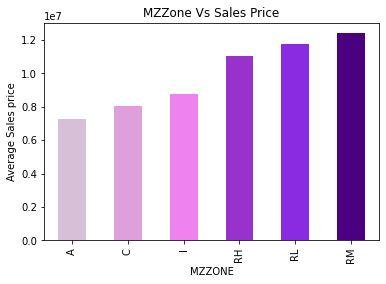

In [26]:
#MZZONE relationship with sales price
zone= df.pivot(columns='MZZONE', values='SALES_PRICE').mean()
fig=zone.plot(kind='bar',color=['thistle','plum','violet','darkorchid','blueviolet','indigo'])
plt.title('MZZone Vs Sales Price')
plt.xlabel('MZZONE')
plt.ylabel('Average Sales price')
plt.show()

MZZONE tend to have linear relationship with the average sales price. 

In [27]:
#Age of the building vs Sales price
fig7=px.scatter(df, x="BUILDING_AGE_AT_SALEDATE", y='SALES_PRICE')
fig7.update_layout(title="Building age when sold vs Sales price")
fig7.update_layout(autosize=False,width=700,height=300)
fig7.show()

There is no relationhip pattern betweeen building age and sales price.Hence dropping the columns below.

In [28]:
df=df.drop(['BUILDING_AGE_AT_SALEDATE','BUILDING_AGE','YEAR_BUILD'],axis=1)

In [29]:
#Relation between 'QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL' Vs sales price
fig = make_subplots(rows=4, cols=1, subplot_titles=['QS_ROOMS vs Average Sales Price',
                                                    'QS_BATHROOM vs Average Sales Price',
                                                    'QS_BEDROOM vs Average Sales Price',
                                                    'QS_OVERALL vs Average Sales Price'])
fig.add_trace(go.Scatter(x=df['QS_ROOMS'], y=df['SALES_PRICE'],mode='markers',name='QS_ROOMS'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['QS_BATHROOM'], y=df['SALES_PRICE'],mode='markers',name='QS_BATHROOM'), row=2, col=1)
fig.add_trace(go.Scatter(x=df['QS_BEDROOM'], y=df['SALES_PRICE'],mode='markers',name='QS_BEDROOM'), row=3, col=1)
fig.add_trace(go.Scatter(x=df['QS_OVERALL'], y=df['SALES_PRICE'],mode='markers',name='QS_OVERALL'), row=4, col=1)
fig.update_layout(height=1200, width=1000)

fig.update_xaxes(title_text="QS_ROOMS", row=1, col=1)
fig.update_xaxes(title_text="QS_BATHROOM", row=2, col=1)
fig.update_xaxes(title_text="QS_BEDROOM", row=3, col=1)
fig.update_xaxes(title_text="QS_OVERALL", row=4, col=1)

fig.update_yaxes(title_text="Average Sales Price", row=1, col=1)
fig.update_yaxes(title_text="Average Sales Price", row=2, col=1)
fig.update_yaxes(title_text="Average Sales Price", row=3, col=1)
fig.update_yaxes(title_text="Average Sales Price", row=4, col=1)

There is no relationhip pattern betweeen 'QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL' and sales price. Also we dont know what these features are. Hence dropping them.

In [30]:
df=df.drop(['QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1)

In [31]:
#creating price/sqft feature
df['PRICE_PER_SQFT']=df['SALES_PRICE']/df['INT_SQFT']

In [32]:
#Year vs price per sqft
mean_ppsqft=df.pivot(columns='YEAR_SALE', values='PRICE_PER_SQFT').mean()
fig=px.line(mean_ppsqft)
fig.update_layout(title="Year vs Average Price per sqft",xaxis_title="Year of sale",
                  yaxis_title="Average price per sqft ")
fig.update_layout(autosize=False,width=500,height=400)
fig.show()

The average price per sqft had incresed for about 47.8% over the years of 2005-2015 for all areas combined.
Even though there is a drop in price in the middle. This gives average inflation in price of around 4.34% from previous value.

In [33]:
mean_ppsqft=pd.pivot_table(df, values='PRICE_PER_SQFT', index=['YEAR_SALE'],columns=['AREA'], aggfunc=np.mean)
mean_ppsqft=pd.DataFrame(mean_ppsqft)
mean_ppsqft

AREA,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
YEAR_SALE,,,,,,,
2004,NaN,NaN,NaN,NaN,NaN,NaN,6371.387852
2005,NaN,NaN,NaN,NaN,NaN,NaN,6337.636745
2006,9993.959438,8772.188811,10470.619952,NaN,NaN,9432.927054,6305.917948
2007,9745.023401,8464.519685,10040.949033,NaN,NaN,9225.700397,6271.548646
2008,9539.594505,8633.391108,10139.464107,6820.845521,NaN,8735.447866,6334.433067
2009,9980.206266,8343.302257,10214.033084,6748.442848,7131.766109,9228.602629,6322.452781
2010,9741.291699,8723.914668,10242.331388,6752.385684,6955.836761,9131.692887,6487.623131
2011,9968.345852,8610.917989,9951.220709,6725.162113,7010.871985,8957.753287,6445.014240
2012,9517.283784,8792.236880,10032.151022,6885.646828,6832.168259,8694.954708,6229.821276


In [34]:
fig=px.line(mean_ppsqft)
fig.update_layout(width=600,height=400,)
fig.update_layout(xaxis_title="Year of sale",yaxis_title="Average price per sqft ",
                  title="Area-wise Year vs Average Price per sqft")

In [35]:
print("Adyar:",mean_ppsqft['Adyar'].mean(skipna=True))
print("Anna Nagar:",mean_ppsqft['Anna Nagar'].mean(skipna=True))
print("Chrompet:",mean_ppsqft['Chrompet'].mean(skipna=True))
print("KK Nagar:",mean_ppsqft['KK Nagar'].mean(skipna=True))
print("Karapakkam:",mean_ppsqft['Karapakkam'].mean(skipna=True))
print("T Nagar:",mean_ppsqft['T Nagar'].mean(skipna=True))
print("Velachery:",mean_ppsqft['Velachery'].mean(skipna=True))

Adyar: 9783.67213503044
Anna Nagar: 8738.786524380866
Chrompet: 10095.309987018032
KK Nagar: 6786.496598802691
Karapakkam: 6982.660778449996
T Nagar: 8911.600596008686
Velachery: 6345.092854106021


the figure shows that average price per sqft for a particular area remains in the same range over a decade. Also average sale price per sqft of each area for 2004 to 2015 is mentiond above.

In [36]:
df=df.drop(['PRICE_PER_SQFT','YEAR_SALE'],axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AREA           7109 non-null   object
 1   INT_SQFT       7109 non-null   int64 
 2   N_ROOM         7109 non-null   int64 
 3   SALE_COND      7109 non-null   object
 4   PARK_FACIL     7109 non-null   object
 5   BUILDTYPE      7109 non-null   object
 6   UTILITY_AVAIL  7109 non-null   object
 7   STREET         7109 non-null   object
 8   MZZONE         7109 non-null   object
 9   SALES_PRICE    7109 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 555.5+ KB


### Encoding

In [38]:
#BUILDTYPE

df = pd.get_dummies(df, columns=['BUILDTYPE'],prefix='BUILDTYPE')

In [39]:
import category_encoders as ce
#AREA
encoder= ce.OrdinalEncoder(cols=['AREA'],return_df=True,
                           mapping=[{'col':'AREA','mapping':{'Karapakkam':1,'Adyar':2,'Chrompet':3,
                                                             'Velachery':4,'KK Nagar':5,'Anna Nagar':6,'T Nagar':7}}])
df=encoder.fit_transform(df)

#SALE_COND
encoder= ce.OrdinalEncoder(cols=['SALE_COND'],return_df=True,
                           mapping=[{'col':'SALE_COND','mapping':{'Partial':1,'Family':2,'AbNormal':3,
                                                             'Normal Sale':4,'AdjLand':5}}])
df=encoder.fit_transform(df)

#PARK_FACIL
encoder= ce.OrdinalEncoder(cols=['PARK_FACIL'],return_df=True,
                           mapping=[{'col':'PARK_FACIL','mapping':{'No':1,'Yes':2}}])
df=encoder.fit_transform(df)

#UTILITY_AVAIL
encoder= ce.OrdinalEncoder(cols=['UTILITY_AVAIL'],return_df=True,
                           mapping=[{'col':'UTILITY_AVAIL','mapping':{'ELO':1,'No Sewage':2,'All Pub':3}}])
df=encoder.fit_transform(df)

#STREET
encoder= ce.OrdinalEncoder(cols=['STREET'],return_df=True,
                           mapping=[{'col':'STREET','mapping':{'No Access':1,'Paved':2,'Gravel':3}}])
df=encoder.fit_transform(df)

#MZZONE
encoder= ce.OrdinalEncoder(cols=['MZZONE'],return_df=True,
                           mapping=[{'col':'MZZONE','mapping':{'A':1,'C':2,'I':3,'RH':4,'RL':5,'RM':6}}])
df=encoder.fit_transform(df)

In [40]:
df.head()

,AREA,INT_SQFT,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,3,3,2,3,2,1,7600000,1,0,0
1,6,1986,5,3,1,3,3,4,21717770,1,0,0
2,2,909,3,3,2,1,3,5,13159200,1,0,0
3,4,1855,5,2,1,2,2,3,9630290,0,0,1
4,1,1226,3,3,2,3,3,2,7406250,0,0,1


### Splitting the data

In [41]:
from sklearn.model_selection import train_test_split

X = df[['AREA','INT_SQFT','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others','UTILITY_AVAIL',
       'STREET','MZZONE']]
y = df['SALES_PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=30)

### Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regresion

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

regressor_linear = LinearRegression()
regressor_linear.fit(X_train_scaled, y_train)
y_pred_lr = regressor_linear.predict(X_test_scaled)
cv_regressor_linear= cross_val_score(regressor_linear,X_train_scaled,y_train,cv=10).mean()


In [44]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_lr))
print("Cross_validation score:",cv_regressor_linear)

R2- SCORE: 0.8965052098815781
Cross_validation score: 0.9003532841666605


### KNN regression

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
from sklearn.neighbors import KNeighborsRegressor

for k in range(1,20):
  regressor_knn = KNeighborsRegressor(n_neighbors=k)
  regressor_knn.fit(X_train_scaled, y_train)
  y_pred_knn = regressor_knn.predict(X_test_scaled)
#   print("K value : ", k, " train score : ", regressor_knn.score(X_train_scaled, y_train) , " test score : ", 
#         cross_val_score(regressor_knn,X_train_scaled, y_train,cv = 10, scoring = 'r2').mean())
cv_regressor_knn= cross_val_score(regressor_knn,X_train_scaled,y_train,cv=10).mean()

In [47]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_knn))
print("Cross_validation score:",cv_regressor_knn)

R2- SCORE: 0.9193397587843668
Cross_validation score: 0.9219456380135422


### Decision tree regression

In [48]:
from sklearn.tree import DecisionTreeRegressor

regressor_dt = DecisionTreeRegressor()
regressor_dt.fit(X_train_scaled, y_train)
y_pred_dt = regressor_dt.predict(X_test_scaled)
cv_regressor_dt= cross_val_score(regressor_dt,X_train_scaled,y_train,cv=10).mean()

In [49]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))
print("Cross_validation score:",cv_regressor_dt)

R2- SCORE: 0.9737855574303466
Cross_validation score: 0.9744313128200724


### Random forest regression

In [50]:
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor(n_estimators = 100, random_state = 30)
regressor_rf.fit(X_train_scaled, y_train)
y_pred_rf = regressor_rf.predict(X_test_scaled)
cv_regressor_rf= cross_val_score(regressor_rf,X_train_scaled,y_train,cv=10).mean()

In [51]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_rf))
print("Cross_validation score:",cv_regressor_rf)

R2- SCORE: 0.9874150607054974
Cross_validation score: 0.9882729270412269


### XG Boost

In [52]:
import xgboost as xgb

for lr in [0.02,0.03,0.06,0.08,0.1,0.12,0.14,0.18,0.2,0.5,0.7,1]:
  regressor_xgb = xgb.XGBRegressor(learning_rate = lr, n_estimators=100)
  regressor_xgb.fit(X_train_scaled, y_train)
  regressor_xgb.score(X_test_scaled, y_test) 
  y_pred_xgb= regressor_xgb.predict(X_test_scaled)
#   print("Learning rate : ", lr, " Train score : ", regressor_xgb.score(X_train_scaled,y_train), " Test score : ",
#         cross_val_score(regressor_xgb, X_train_scaled, y_train, cv=10).mean())
cv_regressor_xgb= cross_val_score(regressor_xgb,X_train_scaled,y_train,cv=10).mean()

In [53]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_xgb))
print("Cross_validation score:",cv_regressor_xgb)

R2- SCORE: 0.9839277046831523
Cross_validation score: 0.9816768934517025


In [54]:
print("R2 metric of models" )
print("Linear Regresion:",metrics.r2_score(y_test,y_pred_lr))
print("KNN regression:",metrics.r2_score(y_test,y_pred_knn))
print("Decision tree regression:",metrics.r2_score(y_test,y_pred_dt))
print("Random forest regression:",metrics.r2_score(y_test,y_pred_rf))
print("XG Boost:",metrics.r2_score(y_test,y_pred_xgb))

R2 metric of models
Linear Regresion: 0.8965052098815781
KNN regression: 0.9193397587843668
Decision tree regression: 0.9737855574303466
Random forest regression: 0.9874150607054974
XG Boost: 0.9839277046831523


As per the above analysis Random forest regression model is the best model and is followed by XG Boost,Decision tree regression,KNN regression and Linear Regresion.

### Feature importance

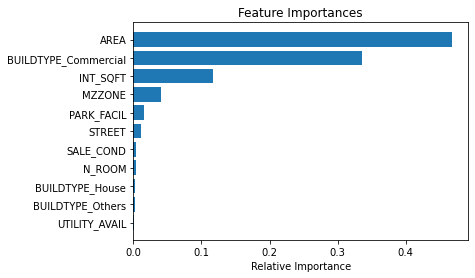

In [55]:

features=X.columns[:]
importances = regressor_rf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices],align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

Top five features are AREA,BUILDTYPE_Commercial,INT_SQFT,MZZONE and PARK_FACIL.

### Predicting range

In [56]:
X_range=X_test[['AREA']]
df_new=pd.concat([X_range,y_test],axis=1)
# df_new.drop(['INT_SQFT','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE_Commercial','BUILDTYPE_House	''PRICE_PER_SQFT','YEAR_SALE'],axis=1)
df_new['PRED_SALES_PRICE']=y_pred_rf
df_new['ABS_DIFF']=abs(df_new['SALES_PRICE']-df_new['PRED_SALES_PRICE'])
df_new['PRICE_MIN']=df_new['PRED_SALES_PRICE']-df_new['ABS_DIFF']
df_new['PRICE_MAX']=df_new['PRED_SALES_PRICE']+df_new['ABS_DIFF']
# df_new

In [57]:
df_new.AREA=df.AREA.map({1:'Karapakkam',2:'Adyar',3:'Chrompet',4:'Velachery',5:'KK Nagar',6:'Anna Nagar',7:'T Nagar'})

In [58]:
pd.pivot_table(df_new, values=['PRICE_MIN','PRICE_MAX'], index=['AREA'], aggfunc=np.mean)

,PRICE_MAX,PRICE_MIN
AREA,,
Adyar,9.353936e+06,8.553332e+06
Anna Nagar,1.568129e+07,1.512337e+07
Chrompet,1.018965e+07,9.650632e+06
KK Nagar,1.335832e+07,1.278801e+07
Karapakkam,7.778905e+06,6.987415e+06
T Nagar,1.540996e+07,1.486836e+07
Velachery,1.115206e+07,1.035395e+07


#### Insights to Buyers:

Area to buy for buyer can be suggested based on the budget of buyer.
Budget >1.5 crores - T Nagar, Anna Nagar 
Budget 1 crore to 1.5 crore - KK Nagar,Velachery,Chrompet
Budget <1 crore - Adayar and Karapakkam 

Properties having parking and all utilities have high price comparitively.

#### Insights to Sellers:

Value  of properties sold is highiest in T Nagar and Anna Nagar.
But when considering the number of properties sold Chrompet and Karapakkam are highest.
As seen already,there is almost equal distribution of house,commercial and other types in areas.

So in terms of value commercial proerty has an edge than House and other type.


#### Important factors that contribute towards the price:

AREA,BUILDTYPE_Commercial,INT_SQFT,MZZONE and PARK_FACIL plays vital role in determining the price.


#### Forecast range:

Average price of a house would be 85 lakhs to 1 crore
Average price of a Commercial would be 1.2 to 1.4 crores
Average price of a other type would be 90 lakhs to 1 crore
 
Depending on the location and sqft the average price may go up or down.
The average minimum an maximum price range of a property for the areas is mentioned below:

Area        Price range

Adyar       85.53 lakhs  to  93.53 lakhs

Anna Nagar  1.51 crore   to  1.56 crore

Chrompet    96.50 lakhs  to  1.01 crore

KK Nagar    1.27 crore   to  1.33 crore

Karapakkam  69.87 lakhs  to  77.78 lakhs

T Nagar     1.48 crore   to  1.54 crore

Velachery   1.03 crore   to  1.11 crore
